In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle

In [52]:
data = pd.read_csv('/content/XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv')

In [7]:
print(data.head())
print(data.describe())

     Year                    Major                University  Time  \
0  Year 2                  Physics  Indiana State University    12   
1  Year 3                Chemistry     Ball State University    14   
2  Year 3                Chemistry         Butler University    12   
3  Year 2                  Biology  Indiana State University    11   
4  Year 3  Business Administration         Butler University    12   

                                               Order  
0                               Fried Catfish Basket  
1                                    Sugar Cream Pie  
2                                 Indiana Pork Chili  
3                               Fried Catfish Basket  
4  Indiana Corn on the Cob (brushed with garlic b...  
              Time
count  5000.000000
mean     12.528200
std       1.357193
min       8.000000
25%      12.000000
50%      13.000000
75%      13.000000
max      17.000000


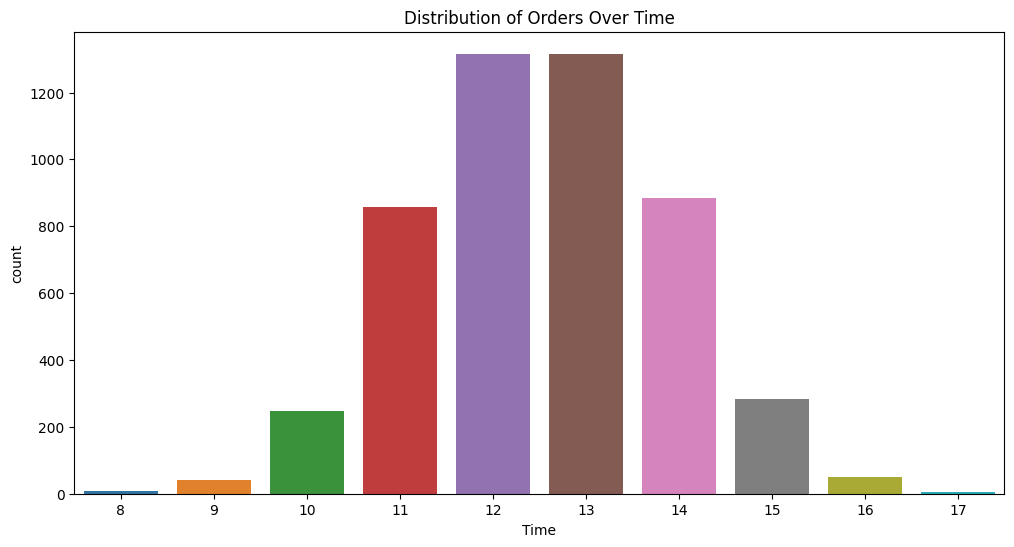

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Time', data=data)
plt.title('Distribution of Orders Over Time')
plt.show()

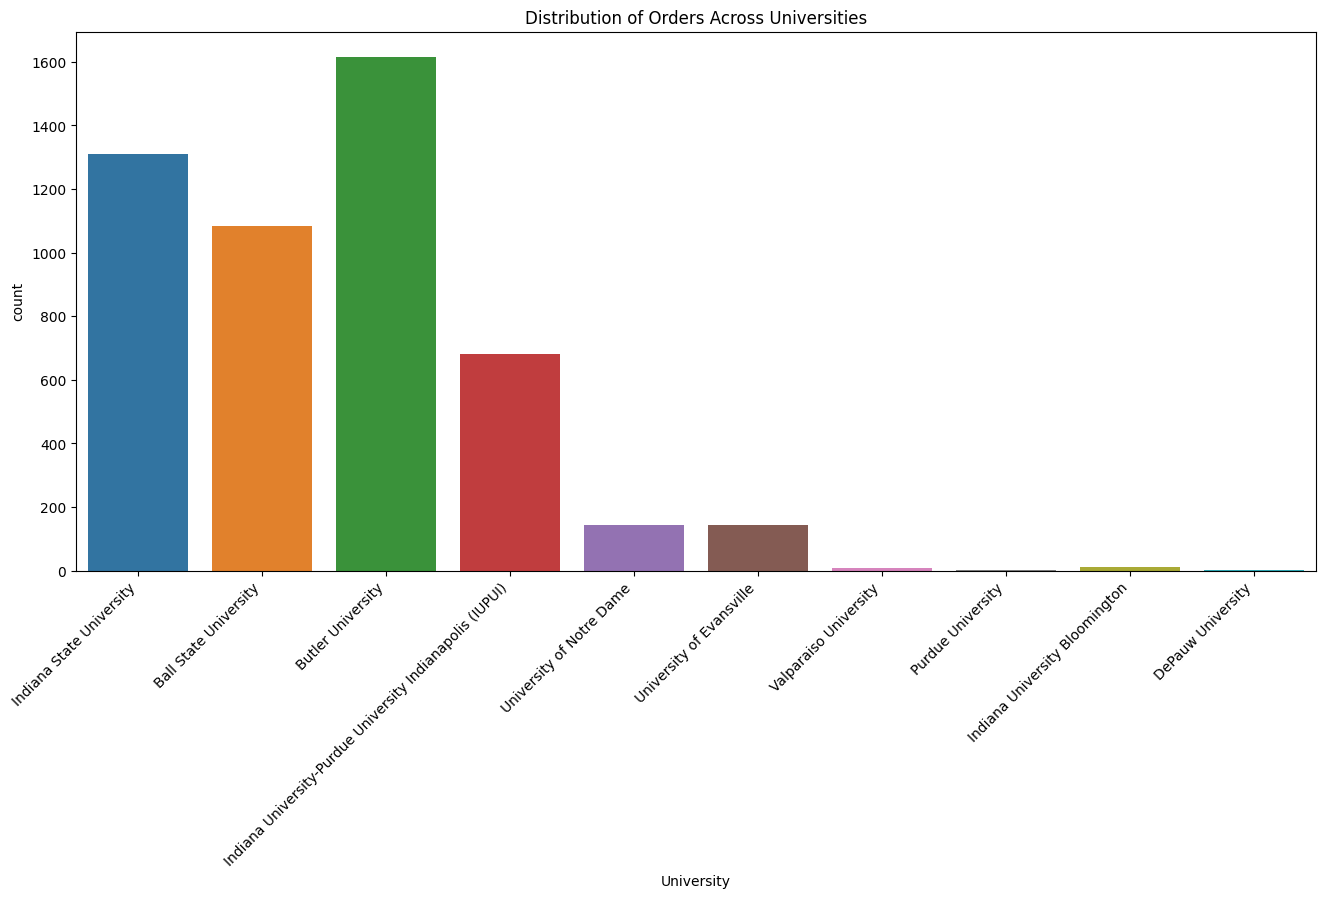

In [27]:
plt.figure(figsize=(16, 7))
sns.countplot(x='University', data=data)
plt.title('Distribution of Orders Across Universities')
plt.xticks(rotation=45, ha='right')
plt.show()

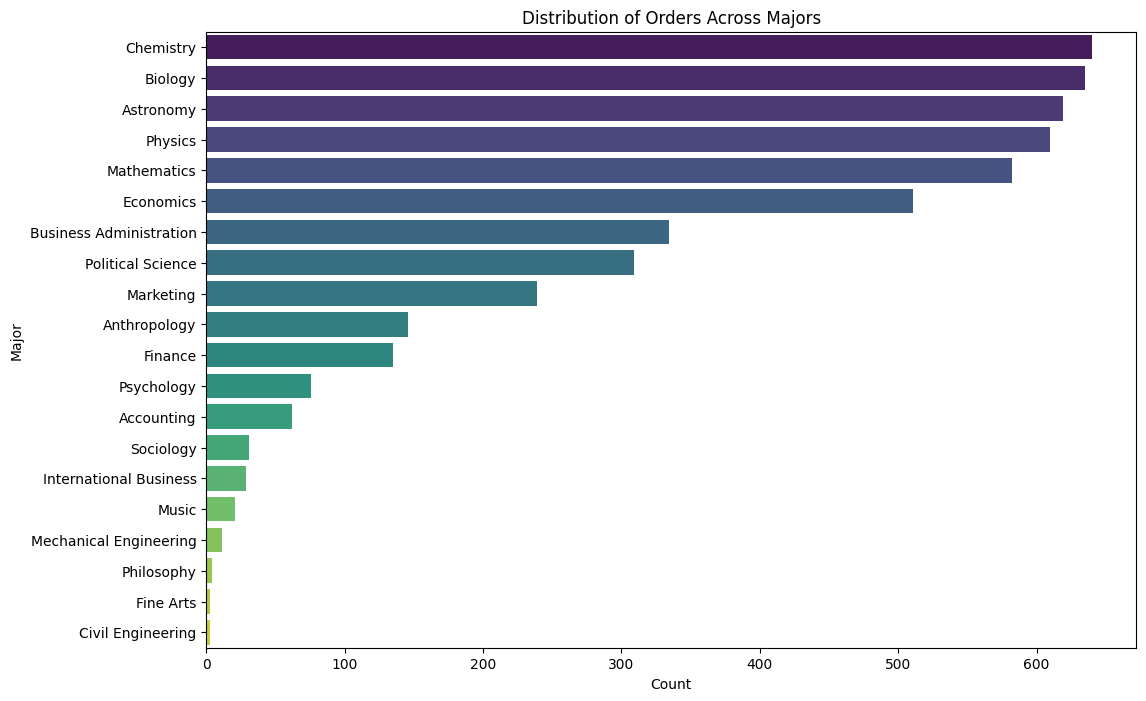

In [25]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Major', data=data, order=data['Major'].value_counts().index, palette='viridis')
plt.title('Distribution of Orders Across Majors')
plt.xlabel('Count')
plt.show()

###Ethical, Business and Technical implications
1. Ensure that the participants of the study know where the data will be used and take appropriate consent before conducting the study.
2. Make sure the data is kept safe from any breaches.
3. Be aware of social bias that exists in the dataset and ensure that your model doesn't amplify the bias.

In [58]:
def preprocess(data):
    X=data.drop('Order',axis=1)
    y=data['Order']
    label_encoder=LabelEncoder()
    X['University']=label_encoder.fit_transform(X['University'])
    X['Major']=label_encoder.fit_transform(X['Major'])
    X['Time']=label_encoder.fit_transform(X['Time'])
    return X,y

In [59]:
def training(X_train,y_train,model_name='order_predictor.pkl'):
    X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.2,random_state=42)
    model=RandomForestClassifier(random_state=42)
    model.fit(X_train,y_train)
    with open(model_name,'wb') as file:
        pickle.dump(model,file)
    return X_test,y_test,model

In [60]:
data['Year']=data['Year'].str.replace('Year ', '')
X,y=preprocess(data)
X_test,y_test,trained_model=training(X,y)
y_pred=trained_model.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
classification_rep=classification_report(y_test,y_pred)
print(f"Accuracy: {accuracy*100:.3f}%")

Accuracy: 65.100%


###Considerations
1. Make sure that the project aligns with the broader bsuiness objective of corrrectly predicting the order of the student.
2. Make sure that the data we have is of high quality i.e. it is fair and unbiased.
3. Make sure that the solution is scalable. So, in the future when the business expands and the number of customers increase the model still performs well.